In [1]:
import pandas as pd

project_dir = '/Users/David/Work/data_science/food_environment/'

restaurants = pd.read_csv(project_dir + 'data/RESTAURANTS.csv')
health = pd.read_csv(project_dir + 'data/HEALTH.csv')

# I would still like to know more about how PC_FFRSALES07 and PC_FSRSALES07 were collected/derived
diabetes_and_expenditures = restaurants.merge(health, on='FIPS', suffixes=('', '_y'))[['FIPS', 'State', 'County', 'PC_FFRSALES07', 'PC_FSRSALES07', 'PCT_DIABETES_ADULTS08']]
state_diabetes_and_expenditures = diabetes_and_expenditures[['State', 'PC_FFRSALES07', 'PC_FSRSALES07', 'PCT_DIABETES_ADULTS08']].groupby(['State', 'PC_FFRSALES07', 'PC_FSRSALES07']).agg('median').reset_index()
state_diabetes_and_expenditures.head()


,State,PC_FFRSALES07,PC_FSRSALES07,PCT_DIABETES_ADULTS08
0,AK,582.715510,688.084194,6.5
1,AL,649.511367,484.381507,12.9
2,AR,576.210444,444.921822,11.2
3,AZ,760.500461,758.628372,8.4
4,CA,761.447125,755.587505,7.6


In [5]:
state_diabetes_and_expenditures.to_csv(project_dir + 'data/state_diabetes_and_expenditures.csv')


In [7]:
from sklearn.linear_model import LinearRegression

ffr_model = LinearRegression().fit(state_diabetes_and_expenditures[['PC_FFRSALES07']], state_diabetes_and_expenditures['PCT_DIABETES_ADULTS08'])

ffr_model.coef_

array([-0.00055838])

In [16]:
# Let's get some significance test results
from scipy.stats import linregress

linregress(state_diabetes_and_expenditures['PC_FFRSALES07'].values, state_diabetes_and_expenditures['PCT_DIABETES_ADULTS08'].values)


LinregressResult(slope=-0.00055837613468758386, intercept=9.7198231811315914, rvalue=-0.04008592165526205, pvalue=0.78002535201794176, stderr=0.0019883266074854351)

In [17]:
# As expected, very weak relationship
# Based on what I saw in earlier scatterplots, the relationship for FSR should be only slightly less weak

linregress(state_diabetes_and_expenditures['PC_FSRSALES07'].values, state_diabetes_and_expenditures['PCT_DIABETES_ADULTS08'].values)
# This is stronger than I expected. I wonder if outliers could be pulling the fit into the suggestion of a strong relationship

LinregressResult(slope=-0.0024913913299284287, intercept=11.093932969519257, rvalue=-0.35099089768130259, pvalue=0.011558497243096747, stderr=0.00094951025622279058)

In [25]:
fsr_sales_07 = state_diabetes_and_expenditures['PC_FSRSALES07'].values
fsr_sales_07

array([  688.0841941,   484.381507 ,   444.9218224,   758.6283717,
         755.5875049,   900.3162096,   711.0000837,  1930.155806 ,
         884.6094946,   919.5131037,   711.7697982,  1340.014378 ,
         476.7934104,   583.9972549,   646.2592516,   565.7680267,
         529.137954 ,   534.383583 ,   522.8837658,   859.63374  ,
         728.9134721,   690.8527025,   542.1518701,   645.9141303,
         617.3390065,   371.8450513,   745.8243506,   665.1112958,
         564.3849268,   518.9839318,   842.7737489,   630.0674443,
         611.6761203,  1205.71428  ,   734.8056595,   577.3736605,
         499.5626916,   778.4382938,   587.9572714,   790.6820348,
         719.9298008,   547.3674031,   654.2676819,   658.5372404,
         506.9786478,   739.1472646,   671.4633221,   713.2695443,
         558.8067883,   434.9249921,   715.6356449])

In [26]:
import numpy
# Sample standard deviation from an underlying DGP of theoretical states; degress of freedom = N - 1
# This could qualify fewer observations as outliers, making it easier to conclude the existence of a significant relationship
fsr_std = numpy.std(fsr_sales_07, ddof=1)
fsr_std

248.53388134319022

In [27]:
numpy.std(fsr_sales_07, ddof=0)
# Difference from approaches to standard deviation is small

246.0852119584161

In [28]:
fsr_mean = numpy.mean(fsr_sales_07)
fsr_mean

696.44195163725487

In [36]:
fsr_sales_t_scores = list((sales - fsr_mean) / fsr_std for sales in fsr_sales_07)
fsr_sales_t_scores

[-0.033628242121700444,
 -0.85324561581376213,
 -1.0120154559125929,
 0.25021304832428243,
 0.23797782798504427,
 0.82030770557686516,
 0.058576045986431943,
 4.9639664728816593,
 0.75711022555879359,
 0.89754825723224207,
 0.061673066383973678,
 2.5894756195195066,
 -0.88377705305278409,
 -0.45243206330482039,
 -0.20191492510415382,
 -0.52577911804633415,
 -0.67316374223533582,
 -0.6520574489136759,
 -0.69832807060054525,
 0.65661787230289248,
 0.13065228888413236,
 -0.022488882027061865,
 -0.62080099784947251,
 -0.20330355388239074,
 -0.31827831565558168,
 -1.3060468801395828,
 0.19869483667924939,
 -0.12606191022298352,
 -0.53134415365647014,
 -0.71401942816887143,
 0.5887800748610269,
 -0.26706422069512936,
 -0.34106348349424942,
 2.0491062450334971,
 0.15436007217772532,
 -0.47908273308152438,
 -0.79216265795725616,
 0.3299201771589429,
 -0.43649855565347595,
 0.37918404787881921,
 0.094505622476122972,
 -0.59981579868140356,
 -0.16969223475417503,
 -0.15251325506365807,
 -0.76232

In [42]:
pd.DataFrame(fsr_sales_t_scores).sort_values(by=0, ascending=False)

,0
7,4.963966
11,2.589476
33,2.049106
9,0.897548
5,0.820308
8,0.757110
19,0.656618
30,0.588780
39,0.379184
37,0.329920


In [47]:
# There's a clear cutoff between observations > 2 standard deviations out and all other observations
# Let's use that as our criterion for outliers and get their indexes to drop them from input arrays
sorted_fsr_sales_t_scores = pd.DataFrame(fsr_sales_t_scores).sort_values(by=0, ascending=False)
outlier_indexes = sorted_fsr_sales_t_scores[sorted_fsr_sales_t_scores[0] > 2].index.values
outlier_indexes

array([ 7, 11, 33])

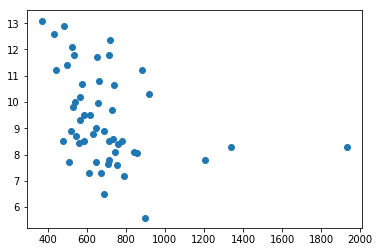

In [52]:
# Let's see what the distribution looks like with all data
import matplotlib.pyplot as plt

plt.scatter(state_diabetes_and_expenditures['PC_FSRSALES07'], state_diabetes_and_expenditures['PCT_DIABETES_ADULTS08'])
plt.show()

In [70]:
state_diabetes_and_expenditures[['PC_FSRSALES07']]

,PC_FSRSALES07
0,688.084194
1,484.381507
2,444.921822
3,758.628372
4,755.587505
5,900.316210
6,711.000084
7,1930.155806
8,884.609495
9,919.513104


In [89]:
# Let's purge outliers
state_diabetes_and_expenditures.drop(index=outlier_indexes)

TypeError: drop() got an unexpected keyword argument 'index'

In [90]:
pd.__version__
# This version of pandas does not drop on index
# http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.DataFrame.drop.html#pandas.DataFrame.drop

'0.20.3'

In [91]:
inliers = state_diabetes_and_expenditures.index.difference(outlier_indexes)

In [93]:
# Confirming outliers purged
state_diabetes_and_expenditures_without_outliers = state_diabetes_and_expenditures[state_diabetes_and_expenditures.index.isin(inliers)]
state_diabetes_and_expenditures_without_outliers 

,State,PC_FFRSALES07,PC_FSRSALES07,PCT_DIABETES_ADULTS08
0,AK,582.715510,688.084194,6.50
1,AL,649.511367,484.381507,12.90
2,AR,576.210444,444.921822,11.20
3,AZ,760.500461,758.628372,8.40
4,CA,761.447125,755.587505,7.60
5,CO,747.095794,900.316210,5.60
6,CT,569.331080,711.000084,7.65
8,DE,652.446401,884.609495,11.20
9,FL,632.337378,919.513104,10.30
10,GA,749.666553,711.769798,11.80


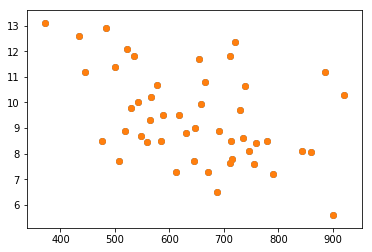

In [95]:
# Outlier-free scatterplot
plt.scatter(state_diabetes_and_expenditures_without_outliers['PC_FSRSALES07'], state_diabetes_and_expenditures_without_outliers['PCT_DIABETES_ADULTS08'])
plt.show()

In [96]:
# Looks pretty good. Based on just this glance, I'm no longer too concerned about heteroscedasticity
# What p-values do we get now? Let's arbitrarily take a priori alpha as 0.05
linregress(state_diabetes_and_expenditures_without_outliers['PC_FSRSALES07'].values, state_diabetes_and_expenditures_without_outliers['PCT_DIABETES_ADULTS08'].values)


LinregressResult(slope=-0.0061097476662090536, intercept=13.386724778412715, rvalue=-0.43798448854390087, pvalue=0.0018494954289697508, stderr=0.0018489998676206759)

In [97]:
# Previous values, including outliers:
# LinregressResult(slope=-0.0024913913299284287, intercept=11.093932969519257, rvalue=-0.35099089768130259, pvalue=0.011558497243096747, stderr=0.00094951025622279058)

# This is actually really interesting, suggesting FSR expenditures per capita move with the prevalence of diabetes in a state
# Ideas: 
# Expenditure reflects quality of a food "ecosystem"
# FSR spending cannot happen without presence of full-service restaurants
# FSR presence indicates wealth of food options or just wealth and more resources for healthy living

# Ways to investigate ideas further
# 1. Does this replicate for the data from 2012/2013?
# 2. Does it hold for lower levels of analysis? County? City?
# 3. Expenditure per capita is at least an indicator. Can we isolate a stronger one, 
# or even something causal in the pathway to diabetes rates from other community conditions?
